### User settings

In [1]:
data_path = "./data/"

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from thermopot import materials, calculations, reactions, potentials, potential 

### Read in data and build materials

In [3]:
BaZrS3_calc = calculations.AimsCalculation(data_path+"raw_aims_files/ternary/BaZrS3_Pnma/scan/aims.out")

BaS_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS_Fm-3m/scan/aims.out")
BaS2_calc  = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS2_C2_c/scan/aims.out")
BaS3_P4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS3_P-421m/scan/aims.out")
BaS3_P2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS3_P2_12_12/scan/aims.out")
Ba2S3_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/Ba2S3_I4_1md/scan/aims.out")

ZrS_P4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS_P4_nmm/scan/aims.out")
ZrS_Fm_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS_Fm-3m/scan/aims.out")
ZrS3_P2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS3_P2_1m/scan/aims.out")
ZrS2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS2_P-3m1/scan/aims.out")
Zr3S4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/Zr3S4_Fd-3m/scan/aims.out")

Ba_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/Ba_Im-3m/scan/aims.out")
Zr_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/Zr_P63_mmc/scan/aims.out")
S_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/S_P2_c/scan/aims.out")

S2_calculation = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/S2/scan/aims.out",gas=True)
S8_calculation = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/S8/scan/aims.out",gas=True)

In [4]:
BaZrS3 = materials.Solid("BaZrS3",{"Ba": 1,"Zr": 1,"S":3},data_path+"phonopy_output/BaZrS3_Pnma.dat",calculation=BaZrS3_calc)

BaS = materials.Solid("BaS", {"Ba":1, "S": 1},data_path+"phonopy_output/BaS_Fm-3m.dat",calculation=BaS_calc)
BaS2 = materials.Solid("BaS2", {"Ba":1, "S": 2},data_path+"phonopy_output/BaS2_C2_c.dat",calculation=BaS2_calc)
BaS3_P4 = materials.Solid("BaS3", {"Ba":1, "S": 3},data_path+"phonopy_output/BaS3_P-421m.dat",calculation=BaS3_P4_calc)
BaS3_P2 = materials.Solid("BaS3_P2", {"Ba":1, "S": 3},data_path+"phonopy_output/BaS3_P2_12_12.dat",calculation=BaS3_P2_calc)
Ba2S3 = materials.Solid("Ba2S3", {"Ba":2, "S": 3},data_path+"phonopy_output/Ba2S3_I4_1md.dat",calculation=Ba2S3_calc)

ZrS_P4 = materials.Solid("ZrS2",{"Zr": 1,"S": 1},data_path+"phonopy_output/ZrS_P4_nmm.dat",calculation=ZrS_P4_calc)
ZrS_Fm = materials.Solid("ZrS2",{"Zr": 1,"S": 1},data_path+"phonopy_output/ZrS_Fm-3m.dat",calculation=ZrS_Fm_calc)
ZrS3_P2 = materials.Solid("ZrS2",{"Zr": 1,"S": 3},data_path+"phonopy_output/ZrS3_P2_1m.dat",calculation=ZrS3_P2_calc)
ZrS2 = materials.Solid("ZrS2",{"Zr": 1,"S": 2},data_path+"phonopy_output/ZrS2_P-3m1.dat",calculation=ZrS2_calc)
Zr3S4 = materials.Solid("ZrS2",{"Zr": 3,"S": 4},data_path+"phonopy_output/Zr3S4_Fd-3m.dat",calculation=Zr3S4_calc)

S8 = materials.IdealGas("S8",{'S':8},data_path+"nist_janaf/S8.dat",calculation=S8_calculation,zpe_lit=0.39)
S2 = materials.IdealGas("S2",{'S':2},data_path+"nist_janaf/S2.dat",calculation=S2_calculation,zpe_lit=0.047)

Ba = materials.Solid("Ba",{"Ba": 1},data_path+"phonopy_output/Ba_Im-3m.dat",calculation=Ba_calc)
Zr = materials.Solid("Zr",{"Zr": 1},data_path+"phonopy_output/Zr_P63_mmc.dat",calculation=Zr_calc)
S =  materials.Solid("S",{"S":1},data_path+"phonopy_output/S_adam.dat",calculation=S_calc)

S_g = materials.Sulfur_model(S8_calculation.energy/8)  
# Note that S_g.mu is the chemical potential for a single particle of sulfur in equilibrium, including the effects
# mixing between sulfur species.

### Define temperature and pressure range

The Sulfur model is only valid for 400-1500K and 10^0-10^7 Pascal.

In [5]:
T = np.linspace(400,1500,1000) # K
P = np.array( np.logspace(0,7,1000),ndmin=2).transpose() # Pa   valid region for sulfur mode

# Formation from elemental compounds
## Ba + Zr + 3S --> BaZrS3 (sulfur solid)

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

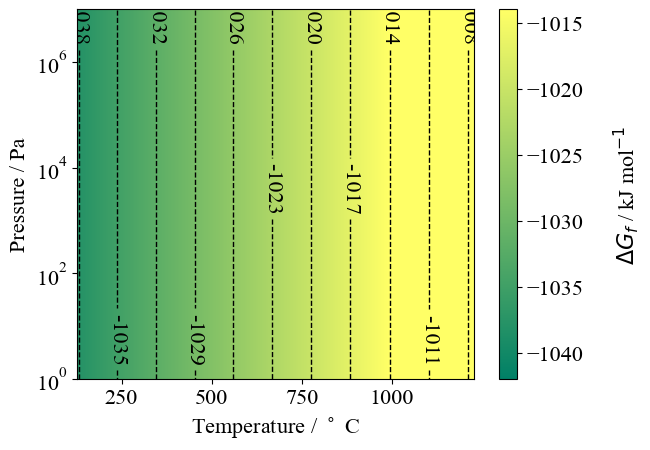

In [6]:
bulk_reaction = reactions.Reaction({Ba:1,Zr:1,S:3},{BaZrS3:1},temperature=T,pressure=P)
GFE = bulk_reaction.Dmu(xc='scan',units="kJ")
GFE.plot_TvsP(scale_range=[-1042,-1014],T_units="C")

Standard heat of formation phase diagram. This tells us that the perovskite is stable compared to the consituent elements in thier most stable forms. 

## 8Ba + 8Zr + S8 --> 8BaZrS3 (annealed in sulfur gas)

To demarcate the regions where gaseous sulfur allotropes S2 and S8 dominate, we calculate the chemical potential of S2 formation (only), S8 formation (only) and then use the wonder of Numpy to create a boolean array where S8 is more stable than S2. This can be plotted as a contour plot, with the level set at 0.5 to demarcate region of True (=1) and False (=0).

Note that our sampling of T and P space has to be quite dense to allow for a smooth line.

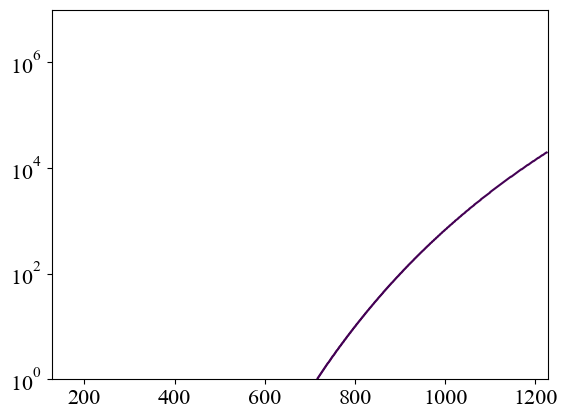

In [7]:
S2_formation = reactions.Reaction({},{S2:1},temperature=T,pressure=P)
S2_mu = S2_formation.Dmu(xc='scan',units="kJ")

S8_formation = reactions.Reaction({},{S8:1},temperature=T,pressure=P)
S8_mu = S8_formation.Dmu(xc='scan',units="kJ")

plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])
plt.yscale('log')

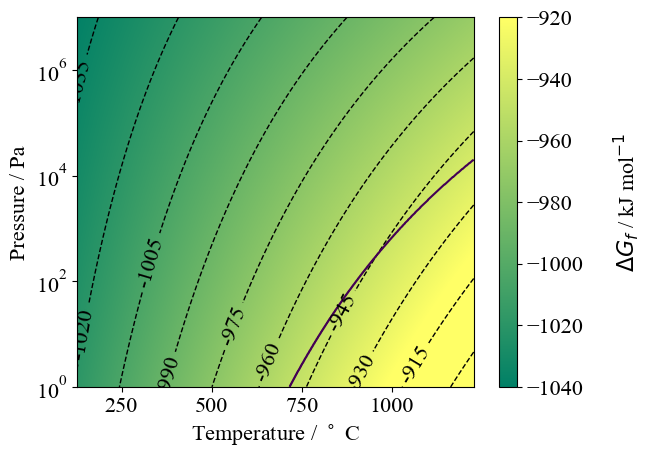

In [8]:
S8_reaction = reactions.Reaction({Ba:8,Zr:8,S8:3},{BaZrS3:8},temperature=T,pressure=P,fu=8)
GFE = S8_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-1040, -920],T_units="C")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

## 2Ba + 2Zr + 3S2 --> 2BaZrS3 (annealed in sulfur gas)

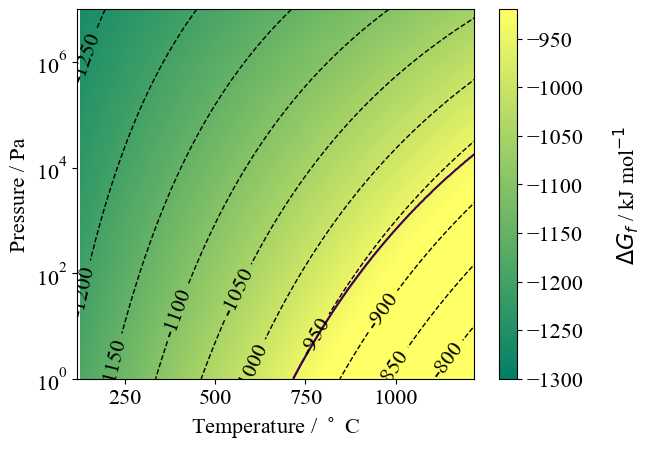

In [9]:
S2_reaction = reactions.Reaction({Ba:2,Zr:2,S2:3},{BaZrS3:2},temperature=T,pressure=P,fu=2)
GFE = S2_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-1300, -920],T_units="C")
plt.xlim(117,1217)
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

## 2Ba + 2Zr + 6S_g --> 2BaZrS3 (annealed in equilibrium sulfur gas)

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

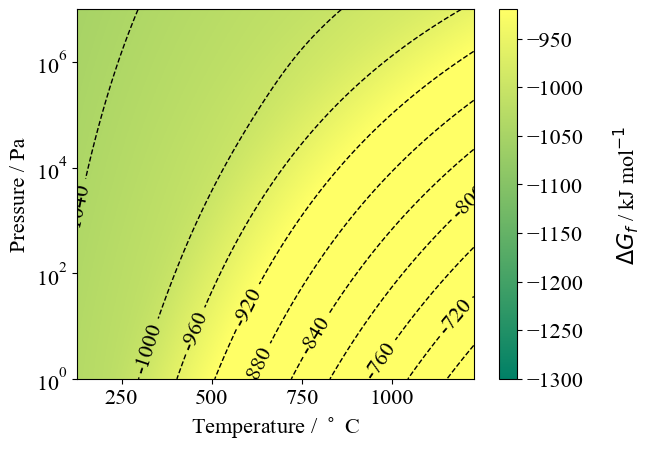

In [10]:
Sg_reaction = reactions.Reaction({Ba:1,Zr:1,S_g:3},{BaZrS3:1},temperature=T,pressure=P)
GFE = Sg_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-1300, -920],T_units="C")

# Formation from binaries (no sulfur gas)
## BaS + ZrS2 --> BaZrS3 

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

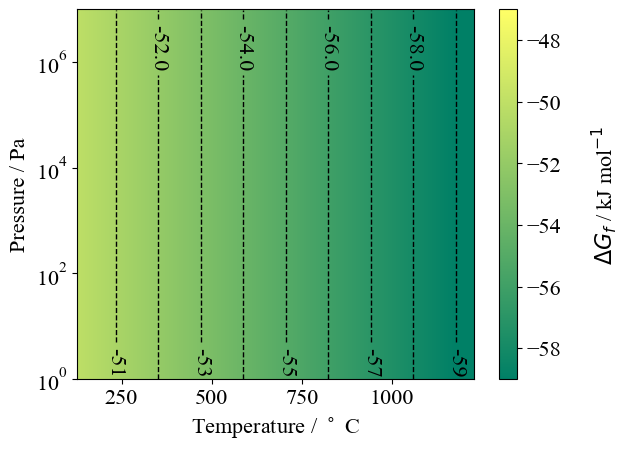

In [12]:
bulk_reaction = reactions.Reaction({BaS:1, ZrS2:1},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-59,-47],precision='%3.1f',T_units="C")

## BaS2 + ZrS (Tetragonal) --> BaZrS3

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

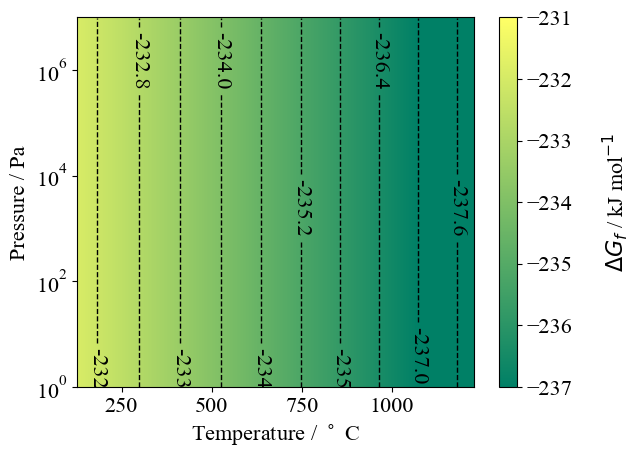

In [13]:
bulk_reaction = reactions.Reaction({BaS2:1, ZrS_P4:1},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-237,-231],precision='%3.1f',T_units="C")

## BaS2 + ZrS (cubic) --> BaZrS3 

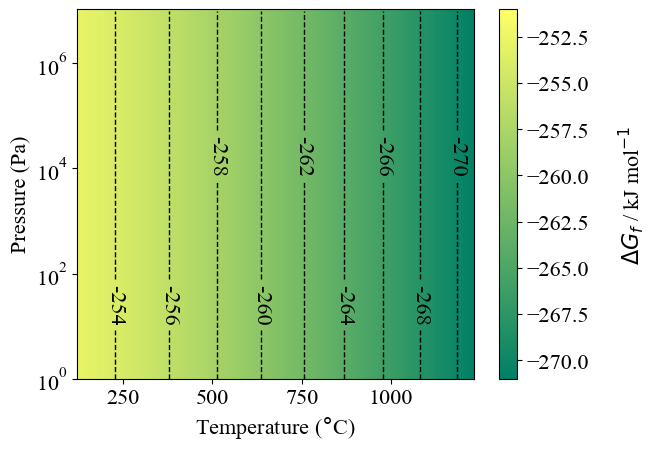

In [17]:
bulk_reaction = reactions.Reaction({BaS2:1, ZrS_Fm:1},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-271,-251],filename='BaS2-ZrScub-BZS.svg',T_units="C")

## BaS3 (Tetragonal) + Zr --> BaZrS3 

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

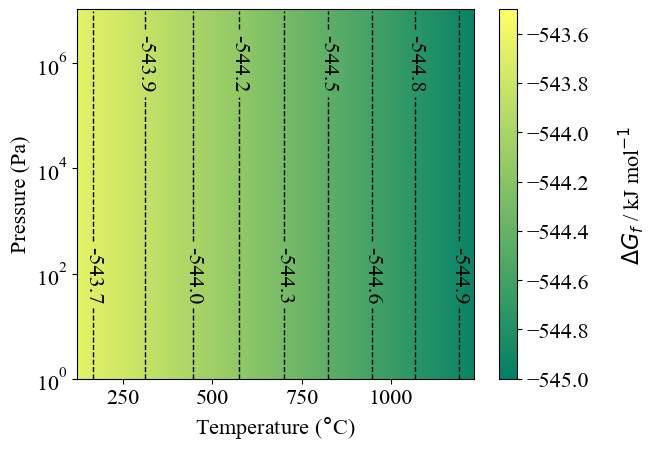

In [18]:
bulk_reaction = reactions.Reaction({BaS3_P4:1, Zr:1},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-545,-543.5],precision='%3.1f',T_units="C")

## BaS3 (Tetragonal) + Zr --> BaZrS3 

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

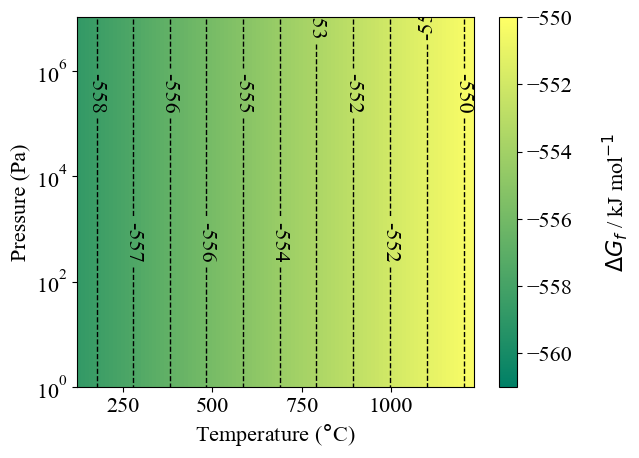

In [19]:
bulk_reaction = reactions.Reaction({BaS3_P2:1, Zr:1},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-561,-550],T_units="C")

## BaS + Zr + 2S --> BaZrS3 

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

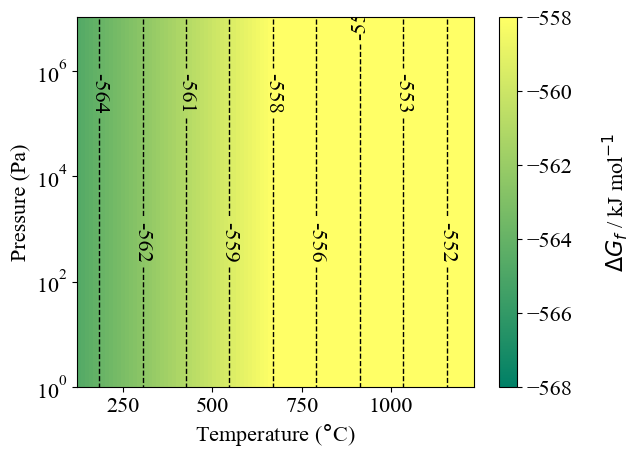

In [20]:
bulk_reaction = reactions.Reaction({BaS:1,Zr:1,S:2},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE_4310 = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE_4310.plot_TvsP(scale_range=[-568,-558],T_units="C")

# Annealed in sulfur gas

## BaS + S2 + Zr --> BaZrS3

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

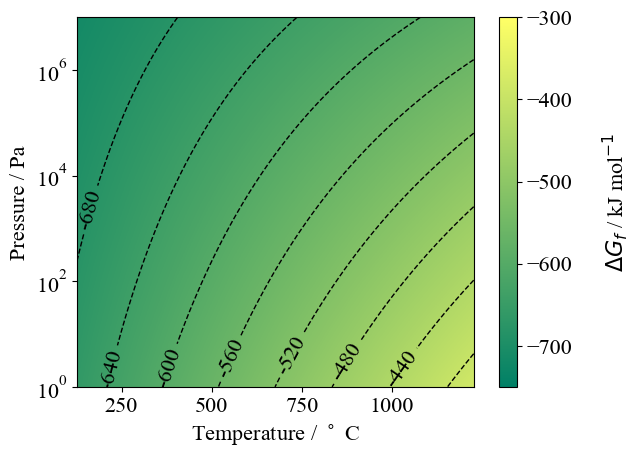

In [14]:
S2_reaction = reactions.Reaction({BaS:1,S2:1,Zr:1},{BaZrS3:1}, temperature=T, pressure=P,fu=1)
GFE = S2_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-750, -300],T_units="C")

## 8BaS + 2S8 + 8Zr --> 8BaZrS3 

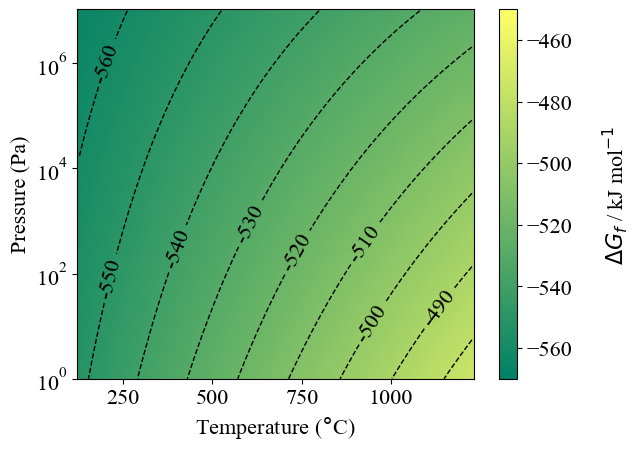

In [20]:
S8_reaction = reactions.Reaction({BaS:8,S8:2,Zr:8},{BaZrS3:8}, temperature=T, pressure=P,fu=8)
GFE = S8_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-570, -450],T_units="C")

## BaS + 2S_g + Zr --> BaZrS3

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

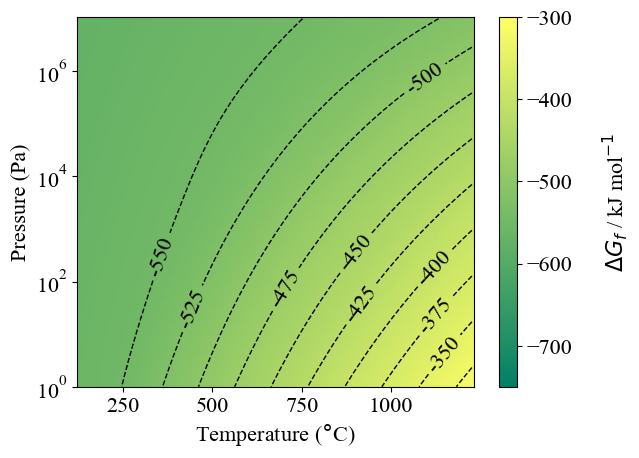

In [16]:
S2_reaction = reactions.Reaction({BaS:1,S_g:2,Zr:1},{BaZrS3:1}, temperature=T, pressure=P,fu=1)
GFE = S2_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-750, -300],T_units="C")

## 2BaS + 2ZrS3 --> 2BaZrS3 + S2 

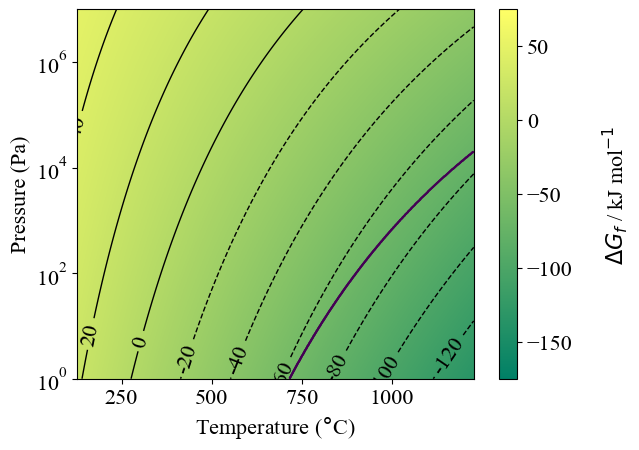

In [44]:
bulk_reaction = reactions.Reaction({BaS:2, ZrS3_P2:2},{BaZrS3:2, S2:1},temperature=T, pressure=P, fu=2)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-175,75],T_units="C")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

## 8BaS + 8ZrS3 --> 8BaZrS3 + S8 

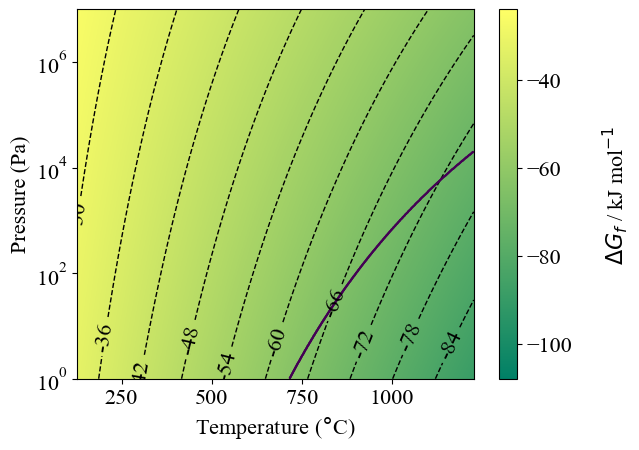

In [45]:
bulk_reaction = reactions.Reaction({BaS:8, ZrS3_P2:8},{BaZrS3:8, S8:1},temperature=T, pressure=P, fu=8)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-108,-24],T_units="C")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

## 8BaS + 8ZrS3 --> 8BaZrS3 + 8S_g 

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

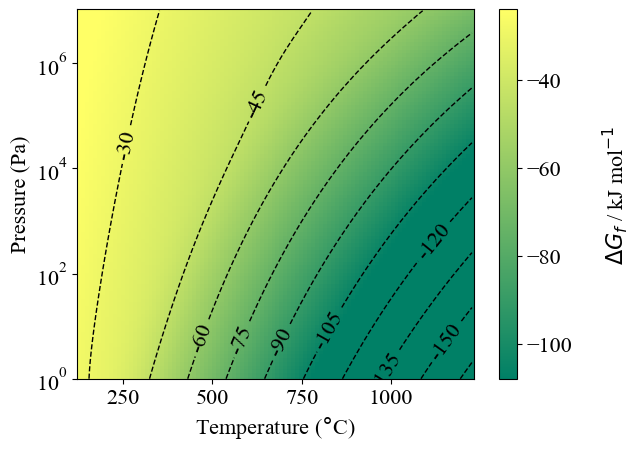

In [24]:
bulk_reaction = reactions.Reaction({BaS:8, ZrS3_P2:8},{BaZrS3:8, S_g:8},temperature=T, pressure=P, fu=8)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-108,-24],T_units="C")

## BaS2 + ZrS3 --> BaZrS3 + S2

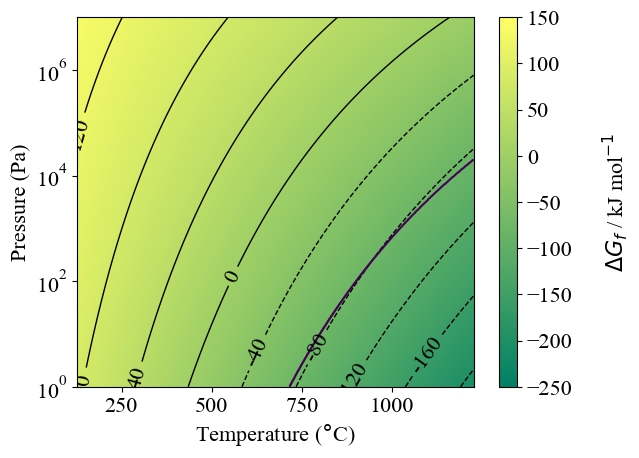

In [47]:
bulk_reaction = reactions.Reaction({BaS2:1, ZrS3_P2:1},{BaZrS3:1, S2:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-250,150],T_units="C")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

## 8BaS2 + 8ZrS3 --> 8BaZrS3 + 2S8

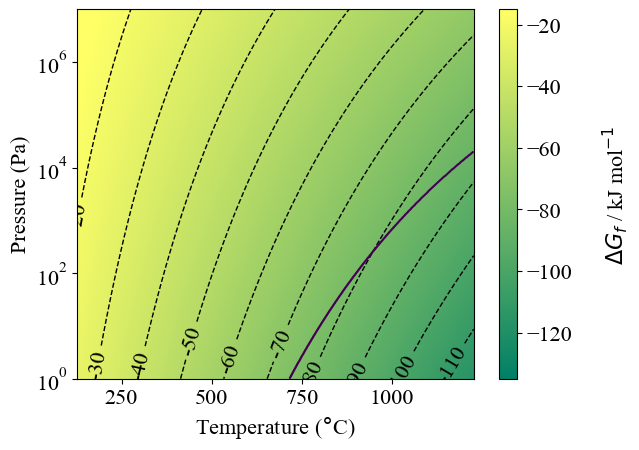

In [49]:
bulk_reaction = reactions.Reaction({BaS2:8, ZrS3_P2:8},{BaZrS3:8, S8:2},temperature=T, pressure=P, fu=8)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-135,-15],T_units="C")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

## 8BaS2 + 8ZrS3 --> 8BaZrS3 + 16S_g

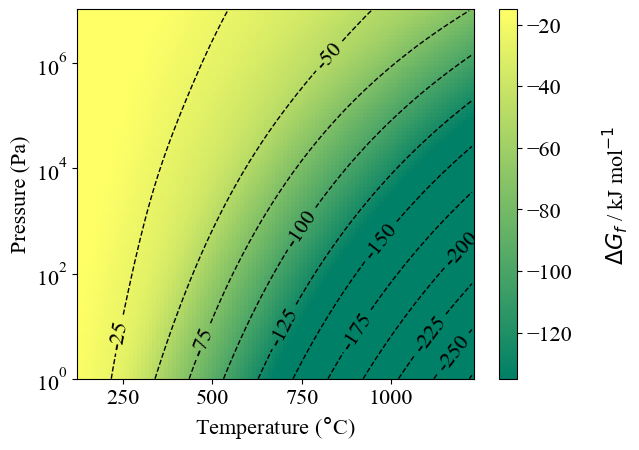

In [29]:
bulk_reaction = reactions.Reaction({BaS2:8, ZrS3_P2:8},{BaZrS3:8, S_g:16},temperature=T, pressure=P, fu=8)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-135,-15],filename='BaS2-ZrS3--BZS-S8.svg',T_units="C",gas_phase="S8")

## 2BaS3 + 2ZrS3 --> 2BaZrS3 +  3S_2

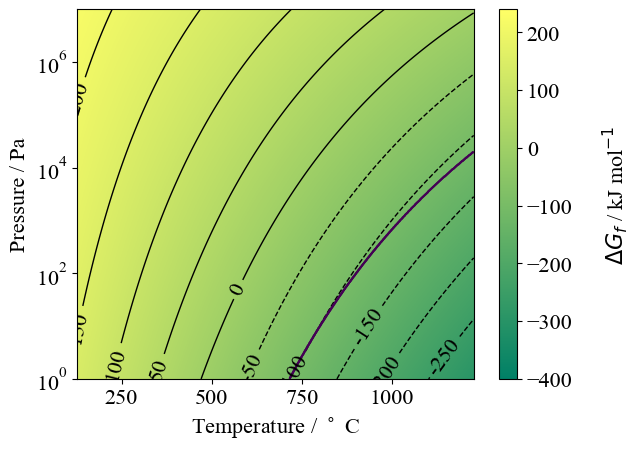

In [21]:
bulk_reaction = reactions.Reaction({BaS3_P4:2,ZrS3_P2:2},{BaZrS3:2,S2:3},temperature=T, pressure=P, fu=2)
GFE = bulk_reaction.Dmu(units="kJ",xc='scan')
plt = GFE.plot_TvsP(scale_range=[-400,240],T_units="C")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])


## 8BaS3 + 8ZrS3 --> 8BaZrS3 +  3S8

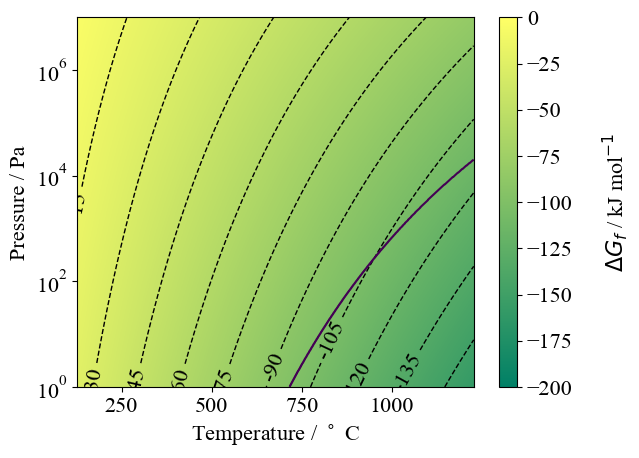

In [22]:
bulk_reaction = reactions.Reaction({BaS3_P4:8,ZrS3_P2:8},{BaZrS3:8,S8:3},temperature=T, pressure=P, fu=8)
GFE = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-200,0],T_units="C")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

## 2BaS3 + 2ZrS3 --> 2BaZrS3 +  6S_g

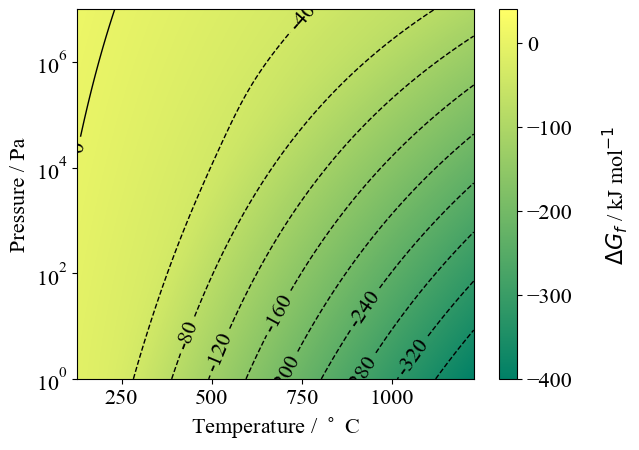

In [23]:
bulk_reaction = reactions.Reaction({BaS3_P4:2,ZrS3_P2:2},{BaZrS3:2,S_g:6},temperature=T, pressure=P, fu=2)
GFE = bulk_reaction.Dmu(units="kJ",xc='scan')
plt = GFE.plot_TvsP(scale_range=[-400,40],T_units="C")

## 2BaS2 + 2ZrS2 --> 2BaZrS3 +  S2 

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

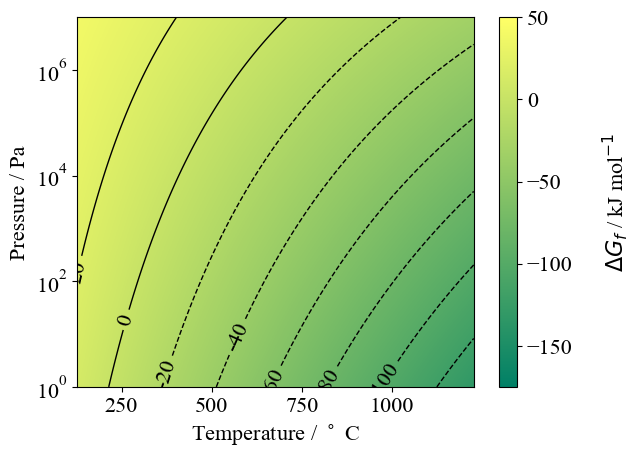

In [24]:
bulk_reaction = reactions.Reaction({BaS2:2,ZrS2:2},{BaZrS3:2,S2:1},temperature=T, pressure=P, fu=2)
GFE = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-175,50],T_units="C")

## 8BaS2 + 8ZrS2 --> 8BaZrS3 +  S8

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

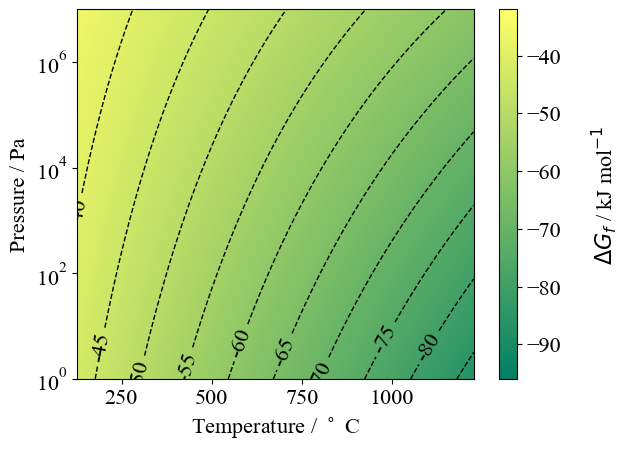

In [25]:
bulk_reaction = reactions.Reaction({BaS2:8,ZrS2:8},{BaZrS3:8,S8:1},temperature=T, pressure=P, fu=8)
GFE = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-96,-32],T_units="C")

## BaS3 + ZrS2 --> BaZrS3 +  S2

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

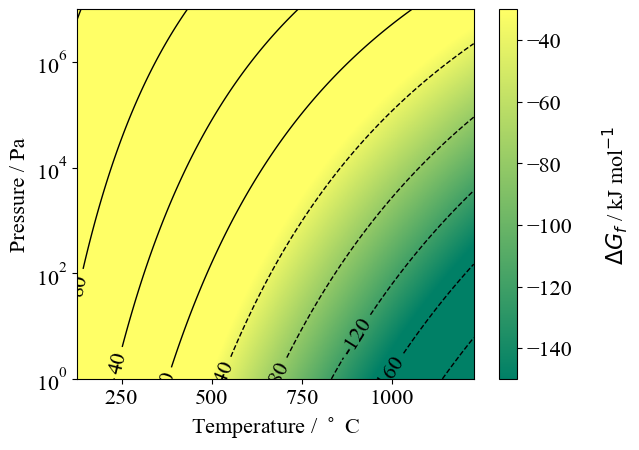

In [26]:
bulk_reaction = reactions.Reaction({BaS3_P4:1,ZrS2:1},{BaZrS3:1,S2:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-150,-30],T_units="C")

## 8BaS3 + 8ZrS2 --> 8BaZrS3 +  2S8 

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

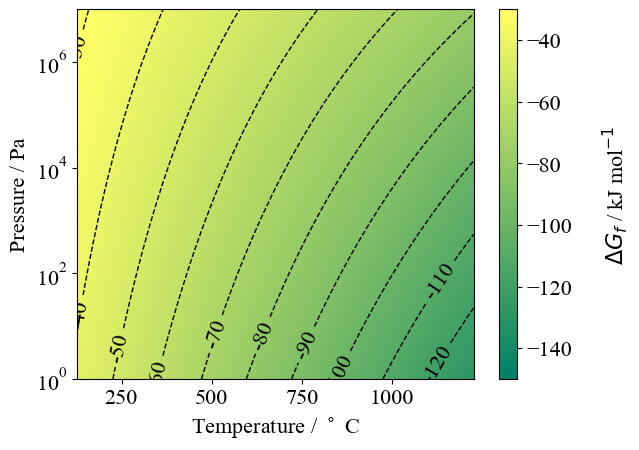

In [27]:
bulk_reaction = reactions.Reaction({BaS3_P4:8,ZrS2:8},{BaZrS3:8,S8:2},temperature=T, pressure=P, fu=8)
GFE = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-150,-30],T_units="C")

## BaS3 + ZrS2 --> BaZrS3 +  2S_g

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

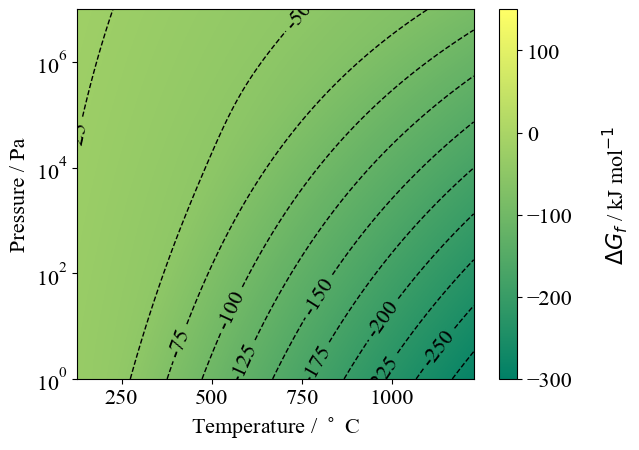

In [28]:
bulk_reaction = reactions.Reaction({BaS3_P4:1,ZrS2:1},{BaZrS3:1,S_g:2},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-300,150],T_units="C")

# S transfer between binaries
### BaS3 + ZrS2 --> BaS2 + ZrS3

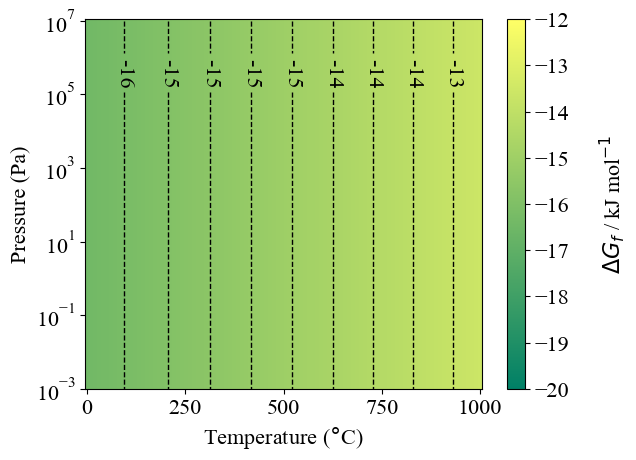

In [60]:
bulk_reaction = reactions.Reaction({BaS3_P4:1,ZrS2:1},{BaS2:1,ZrS3_P2:1},temperature=T, pressure=P, fu=1)
GFE_4310 = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE_4310.plot_TvsP(scale_range=[-20,-12],filename='BaS3-ZrS2.svg',T_units="C")

## Ba-S system: identifying most stable binaries during anneal

### with S2 

To consider stability of Ba-S compounds when annealing in sulfur we will calculate the Gibbs free energy of each of the following reactions, and then display the product with the lowest formation energy as a function of temperature and pressure. Note that we are not assuming that elemental precursors are used. This is exactly equivalent to comparing each of the compounds in turn, and discarding the one with the highest energy.

2Ba +  3S2 --> Ba2S3 +(3/2)S2
2Ba +  3S2 --> 2BaS  + 2S2     
2Ba +  3S2 --> 2BaS2 +  S2     
2Ba +  3S2 --> 2BaS3 (P4)     
2Ba +  3S2 --> 2BaS3 (P2)  

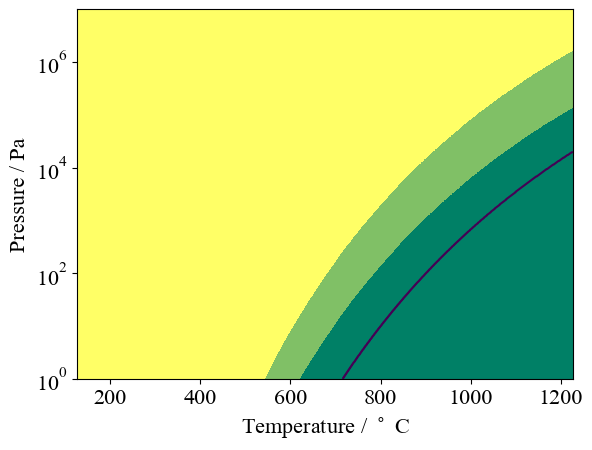

In [50]:
Ba2S3_reaction = reactions.Reaction({Ba:4,S2:6},{Ba2S3:1, S2:1.5},temperature=T, pressure=P, fu=4)
BaS_reaction = reactions.Reaction({Ba:4,S2:6},{BaS:4,S2:4},temperature=T,pressure=P,fu=4)
BaS2_reaction = reactions.Reaction({Ba:4,S2:6},{BaS2:4,S2:2},temperature=T,pressure=P,fu=4)
BaS3_reaction = reactions.Reaction({Ba:4,S2:6},{BaS3_P4:4},temperature=T,pressure=P,fu=4)
BaS3_P2_reaction = reactions.Reaction({Ba:4,S2:6},{BaS3_P2:4},temperature=T,pressure=P,fu=4)

BaS_system = potentials.Potentials(Ba2S3_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS2_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS3_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS3_P2_reaction.Dmu(units="kJ",xc='scan',T=T,P=P))
plt = BaS_system.plot_TvsP(material_labels=["BaS","BaS2","BaS3"],log_scale=True,T_units="C")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

# the solid line denotes where chemical potential of S2 and S8 are equal.

To help demonstrate that this is exactly equivalent to finding the lowest formation energy amongst a range of posible products, we can create a filled contour plot where the gibbs free energy of BaS3 is less than the Gibbs free energy of BaS2. Green is where BaS3 gibbs is less than BaS2 gibbs. We see it lines up perfectly with yellow region above. Can do similar analysis with e.g. BaS2 and BaS to persuade that we have found the lowest energy products in each region.

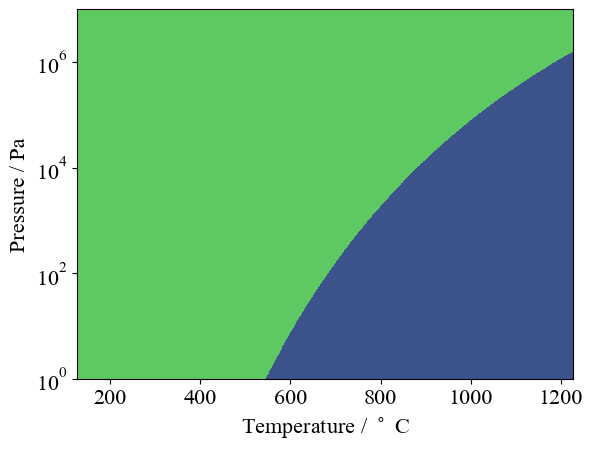

In [51]:
plt = BaS_system.plot_TvsP(material_labels=["BaS","BaS2","BaS3"],log_scale=True,T_units="C")
plt.contourf(T-273,P.flatten(),BaS3_reaction.Dmu(xc='scan').potential <= BaS2_reaction.Dmu(xc='scan').potential, )

### with S8

We repeat the same process, but now with S8 allotrope.

8Ba +  3S8 --> 8BaS   +  2S8        
8Ba +  3S8 --> 8BaS2  +  S8       
8Ba +  3S8 --> 8BaS3 (P2)         
8Ba +  3S8 --> 8BaS3 (P4)    
8Ba +  3S8 --> 4Ba2S3 + (3/2)S8

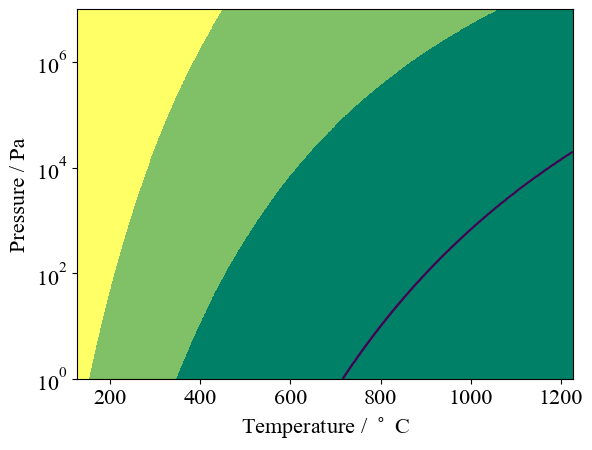

In [53]:
BaS_reaction = reactions.Reaction({Ba:8,S8:3},{BaS:8,S8:2},temperature=T,pressure=P,fu=8)
BaS2_reaction = reactions.Reaction({Ba:8,S8:3},{BaS2:8,S8:1},temperature=T,pressure=P,fu=8)
BaS3_reaction = reactions.Reaction({Ba:8,S8:3},{BaS3_P4:8},temperature=T,pressure=P,fu=8)
BaS3_P2_reaction = reactions.Reaction({Ba:8,S8:3},{BaS3_P2:8},temperature=T,pressure=P,fu=8)
Ba2S3_reaction = reactions.Reaction({Ba:8, S8:3}, {Ba2S3:4, S8:1.5}, temperature=T, pressure=P, fu=8)
BaS_system = potentials.Potentials(BaS3_P2_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),Ba2S3_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS2_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS3_reaction.Dmu(units="kJ",xc='scan',T=T,P=P))
plt = BaS_system.plot_TvsP(material_labels=["BaS","BaS2","BaS3"],log_scale=True,T_units="C")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])


### with Sulfur model

Same analysis again but with the model for sulfur gas in equilibrium.

8Ba +  24S_g --> 8BaS   +  16S_g        
8Ba +  24S_g --> 8BaS2  +  8S_g       
8Ba +  24S_g --> 8BaS3 (P2)           
8Ba +  24S_g --> 8BaS3 (P4)  
8Ba +  24S_g --> 4Ba2S3 + 12S_g

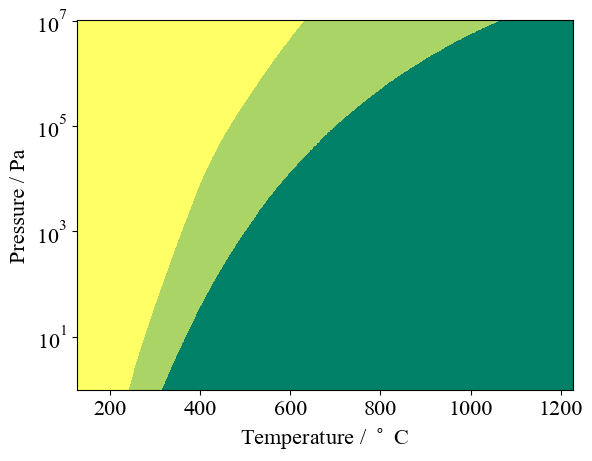

In [54]:
BaS_reaction = reactions.Reaction({Ba:8,S_g:24},{BaS:8,S_g:16},temperature=T,pressure=P,fu=8)
BaS2_reaction = reactions.Reaction({Ba:8,S_g:24},{BaS2:8,S_g:8},temperature=T,pressure=P,fu=8)
BaS3_reaction = reactions.Reaction({Ba:8,S_g:24},{BaS3_P4:8},temperature=T,pressure=P,fu=8)
BaS3_P2_reaction = reactions.Reaction({Ba:8,S_g:24},{BaS3_P2:8},temperature=T,pressure=P,fu=8)
Ba2S3_reaction = reactions.Reaction({Ba:8, S8:3}, {Ba2S3:4, S_g:12}, temperature=T, pressure=P, fu=8)
BaS_system = potentials.Potentials(BaS_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS2_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS3_reaction.Dmu(units="kJ",xc='scan',T=T,P=P))
plt = BaS_system.plot_TvsP(material_labels=["BaS","BaS2","BaS3","BaS3_P2"],log_scale=True,T_units="C")

## Zr-S system

Same approach now applied to the Zr-S system.

### with S2
6Zr + 9S2 --> 6ZrS + 6S2  
6Zr + 9S2 --> 6ZrS2 + 3S2           
6Zr + 9S2 --> 6ZrS3   
6Zr + 9S2 --> 2Zr3S4 + 5S2  

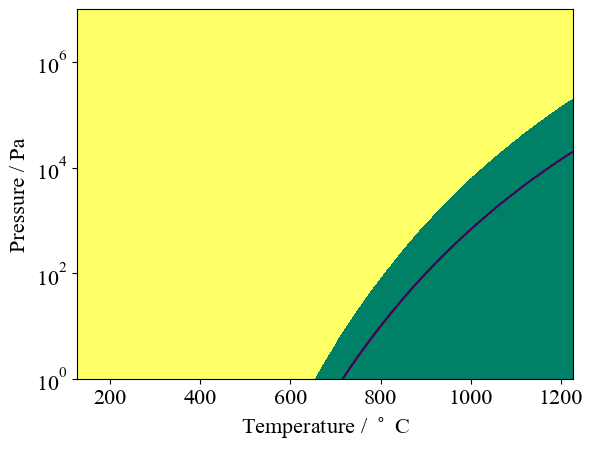

In [58]:
ZrS_reaction = reactions.Reaction({Zr:6,S2:9},{ZrS_P4:6,S2:6},temperature=T,pressure=P,fu=2)
ZrS2_reaction = reactions.Reaction({Zr:6,S2:9},{ZrS2:6,S2:3},temperature=T,pressure=P,fu=2)
ZrS3_reaction = reactions.Reaction({Zr:6,S2:9},{ZrS3_P2:6},temperature=T,pressure=P,fu=2)
Zr3S4_reaction = reactions.Reaction({Zr:6,S2:9},{Zr3S4:2,S2:5},temperature=T,pressure=P,fu=2)
ZrS_system = potentials.Potentials(ZrS2_reaction.Dmu(xc='scan'),ZrS3_reaction.Dmu(xc='scan'),ZrS_reaction.Dmu(xc='scan'),Zr3S4_reaction.Dmu(xc='scan'))

plt = ZrS_system.plot_TvsP(material_labels=["ZrS","ZrS2","ZrS3"],T_units="C")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

### with S8
6Zr + 3S8 --> 6ZrS + (9/4)S8    
6Zr + 3S8 --> 6ZrS2 + (3/2)S8             
6Zr + 3S8 --> 6ZrS3 + (3/4)S8     
6Zr + 3S8 --> 2Zr3S4 + 2S8    


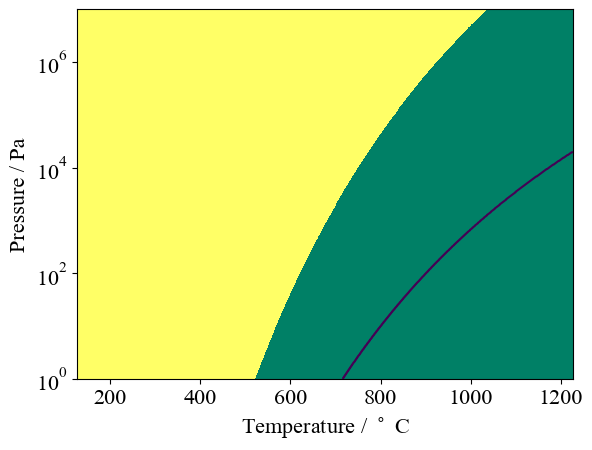

In [60]:
ZrS_reaction = reactions.Reaction({Zr:3,S8:3},{ZrS_P4:6,S8:9/4},temperature=T,pressure=P,fu=6)
ZrS2_reaction = reactions.Reaction({Zr:3,S8:3},{ZrS2:6,S8:3/2},temperature=T,pressure=P,fu=6)
ZrS3_reaction = reactions.Reaction({Zr:3,S8:3},{ZrS3_P2:6,S8:3/4},temperature=T,pressure=P,fu=6)
Zr3S4_reaction = reactions.Reaction({Zr:3,S8:3},{Zr3S4:2, S8:2},temperature=T,pressure=P,fu=6)
ZrS_system = potentials.Potentials(Zr3S4_reaction.Dmu(xc='scan'),ZrS_reaction.Dmu(xc='scan'),ZrS2_reaction.Dmu(xc='scan'),ZrS3_reaction.Dmu(xc='scan'))
plt = ZrS_system.plot_TvsP(material_labels=["ZrS","ZrS2","ZrS3"],T_units="C")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

### with S_g
8Zr + 24S_g --> 8ZrS + 16S_g         
8Zr + 24S_g --> 8ZrS2 + 8S_g                     
8Zr + 24S_g --> 8ZrS3            
8Zr + 24S_g --> (8/3)Zr3S4 + (13+1/3)S_g  

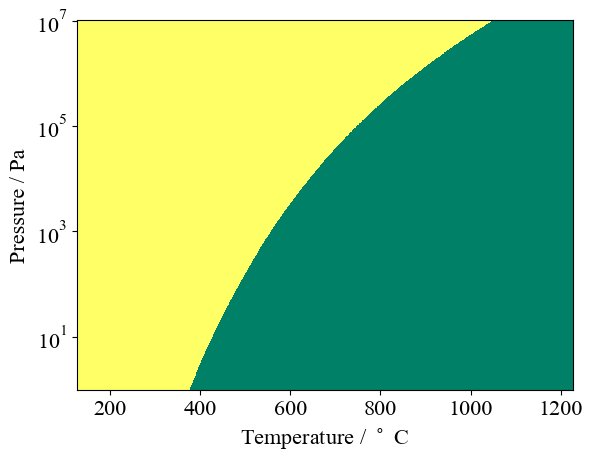

In [61]:
ZrS_reaction = reactions.Reaction({Zr:8,S_g:24},{ZrS_P4:8,S_g:16},temperature=T,pressure=P,fu=8)
ZrS2_reaction = reactions.Reaction({Zr:8,S_g:24},{ZrS2:8,S_g:8},temperature=T,pressure=P,fu=8)
ZrS3_reaction = reactions.Reaction({Zr:8,S_g:24},{ZrS3_P2:8},temperature=T,pressure=P,fu=8)
Zr3S4_reaction = reactions.Reaction({Zr:8,S_g:24},{Zr3S4:8/3, S_g:13+1/3},temperature=T,pressure=P,fu=8)
ZrS_system = potentials.Potentials(Zr3S4_reaction.Dmu(xc='scan'),ZrS_reaction.Dmu(xc='scan'),ZrS2_reaction.Dmu(xc='scan'),ZrS3_reaction.Dmu(xc='scan'))
plt = ZrS_system.plot_TvsP(material_labels=["ZrS","ZrS2","ZrS3"],T_units="C")